# Capstone Project - The Battle of the Neighborhoods (Week 5)

### Applied Data Science Capstone by IBM/Coursera

## System & Data Setup

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim
from tqdm import tqdm
import requests
from collections import deque
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # our main map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.19.0-py_0       conda-forge

The following packages will be UPDATED:

   

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_30b623d9fbb84ad5a67e13a5b5c1530b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DBjRQCR2MCO368gaeFwKD1zq3PMFfB6VVvKqiIiGpGYW',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_30b623d9fbb84ad5a67e13a5b5c1530b.get_object(
    Bucket='courseracapstone-donotdelete-pr-kkyxcjpsbk50a1',Key='wijken_buurten.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
print(len(df_data_1))
df_data_1.head()


579


,subject,region_name,regio_type,region_code,ninhabitants,nmen,nwomen,nage_0_to_15,nage_15_to_25,nage_25_to_45,nage_45_to_65,nage_65_older,nunmarried,nmarried,ndivorced,nwidowed,nimmigrant_western,nimmigrant_nonwestern,nimmigrant_marokko,nimmigrant_antiles_aruba,nimmigrant_surinam,nimmigrant_turkey,nimmigrant_other_non_western,nhouseholds,nhh_single_person,nhh_no_children,nhh_with_children,ave_househ_size,populatio_density,area_total,area_land,area_water,urbanisation_grade,address_density,geojson,lon,lat
0,Amsterdam,Amsterdam,Gemeente,GM0363,833624,411608,422016,127224,108370,293154,204741,100135,531112,203974,73962,24576,140901,289823,75065,12227,66119,42622,93790,456462,251828,92709,111925,1.8,5042.0,21949,16533,5416,1.0,6011.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.879568,52.381000
1,Burgwallen-Oude Zijde,Amsterdam,Wijk,WK036300,4280,2340,1935,255,675,2030,980,355,3280,660,290,65,1275,640,25,40,80,40,455,3070,2160,655,265,1.4,12255.0,40,35,6,1.0,7619.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896943,52.372566
2,Kop Zeedijk,Amsterdam,Buurt,BU03630000,1020,570,445,50,140,520,260,60,765,175,70,15,320,145,5,10,20,10,105,740,520,170,55,1.4,16818.0,8,6,2,1.0,6649.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.900280,52.375937
3,Oude Kerk e.o.,Amsterdam,Buurt,BU03630001,670,365,300,30,130,320,145,55,540,70,55,15,205,105,5,10,15,10,70,500,370,95,45,1.3,7615.0,9,9,0,1.0,7361.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896156,52.373793
4,Burgwallen Oost,Amsterdam,Buurt,BU03630002,1610,880,730,120,250,755,340,155,1230,255,115,25,495,275,10,15,35,10,210,1120,770,260,105,1.4,25867.0,7,6,1,1.0,7544.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.898757,52.372815


In [3]:
#because gemeente Amsterdam row is just a collection of all the info about buurts and wijks)
df_data_1 = df_data_1.drop([0], axis=0)
df_data_1.head()

,subject,region_name,regio_type,region_code,ninhabitants,nmen,nwomen,nage_0_to_15,nage_15_to_25,nage_25_to_45,nage_45_to_65,nage_65_older,nunmarried,nmarried,ndivorced,nwidowed,nimmigrant_western,nimmigrant_nonwestern,nimmigrant_marokko,nimmigrant_antiles_aruba,nimmigrant_surinam,nimmigrant_turkey,nimmigrant_other_non_western,nhouseholds,nhh_single_person,nhh_no_children,nhh_with_children,ave_househ_size,populatio_density,area_total,area_land,area_water,urbanisation_grade,address_density,geojson,lon,lat
1,Burgwallen-Oude Zijde,Amsterdam,Wijk,WK036300,4280,2340,1935,255,675,2030,980,355,3280,660,290,65,1275,640,25,40,80,40,455,3070,2160,655,265,1.4,12255.0,40,35,6,1.0,7619.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896943,52.372566
2,Kop Zeedijk,Amsterdam,Buurt,BU03630000,1020,570,445,50,140,520,260,60,765,175,70,15,320,145,5,10,20,10,105,740,520,170,55,1.4,16818.0,8,6,2,1.0,6649.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.900280,52.375937
3,Oude Kerk e.o.,Amsterdam,Buurt,BU03630001,670,365,300,30,130,320,145,55,540,70,55,15,205,105,5,10,15,10,70,500,370,95,45,1.3,7615.0,9,9,0,1.0,7361.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896156,52.373793
4,Burgwallen Oost,Amsterdam,Buurt,BU03630002,1610,880,730,120,250,755,340,155,1230,255,115,25,495,275,10,15,35,10,210,1120,770,260,105,1.4,25867.0,7,6,1,1.0,7544.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.898757,52.372815
5,Nes e.o.,Amsterdam,Buurt,BU03630003,370,185,180,25,70,195,65,25,300,50,20,5,120,35,5,0,5,5,25,270,205,55,20,1.4,6939.0,6,5,0,1.0,9825.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.893728,52.370861


In [4]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 1 to 578
Data columns (total 37 columns):
subject                         578 non-null object
region_name                     578 non-null object
regio_type                      578 non-null object
region_code                     578 non-null object
ninhabitants                    578 non-null int64
nmen                            578 non-null int64
nwomen                          578 non-null int64
nage_0_to_15                    578 non-null int64
nage_15_to_25                   578 non-null int64
nage_25_to_45                   578 non-null int64
nage_45_to_65                   578 non-null int64
nage_65_older                   578 non-null int64
nunmarried                      578 non-null int64
nmarried                        578 non-null int64
ndivorced                       578 non-null int64
nwidowed                        578 non-null int64
nimmigrant_western              578 non-null int64
nimmigrant_nonwestern   

## Setup Amsterdam Neighborhood Map

In [5]:
# get the coordinates of Amsterdam
address = 'Amsterdam, Nederland'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Amsterdam, Nederland {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam, Nederland 52.3745403, 4.89797550561798.


In [123]:
# group neighbourhoods by coordinates
n_clusters = 10
neigbourhoods_grouped = KMeans(n_clusters=n_clusters, random_state=0).fit(df_data_1[['lat', 'lon']])
neigbourhoods_grouped.cluster_centers_

array([[ 52.35418413,   4.8981259 ],
       [ 52.3656447 ,   4.99573439],
       [ 52.35477417,   4.81402566],
       [ 52.35873673,   4.93480968],
       [ 52.35146221,   4.86206048],
       [ 52.3084988 ,   4.97114465],
       [ 52.39572502,   4.93289053],
       [ 52.37687063,   4.84651167],
       [ 52.37696239,   4.78780509],
       [ 52.38700674,   4.88262484]])

In [124]:
def find_nearest_neighbourhood(centroids, lat, long):
    return np.argmin(np.linalg.norm(centroids - [lat, long], axis = 1)) + 1

In [8]:
# define Foursquare Credentials and Version
CLIENT_ID = 'J0M4JG11FIGT12BVT1PVEDRUPP3RNKVQHJBRU5GWHP2FKVRM' # your Foursquare ID
CLIENT_SECRET = 'XNPREDSKCVE0I1NBHXISFBIJJ0UY10VHGYAMAFLHQGAME4CU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT = 250

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J0M4JG11FIGT12BVT1PVEDRUPP3RNKVQHJBRU5GWHP2FKVRM
CLIENT_SECRET:XNPREDSKCVE0I1NBHXISFBIJJ0UY10VHGYAMAFLHQGAME4CU


In [9]:
# Ams is a huge city with tons of buurts and wijks (neighbourhoods in Dutch), so we have to limit 
# the scope of our search. Let's focus on top-30 coffeeshops and then see which belongs to which neighbourhood.
# Import Requests
import requests

# Import BeautifulSoup
from bs4 import BeautifulSoup
# Use the Requests get method to request the top coffeeshops in Ams
page = requests.get(
    "https://4sq.com/2w53vf2")

# Convert the HTML response into a BeautifulSoup Object
soup = BeautifulSoup(page.content, 'html.parser')

# Use the BeautifulSoup find_all method to extract each top site venue details.
top_venues = soup.find_all('div', class_='venueDetails')

In [10]:
# The column names for the top venues dataframe
venue_columns = ['id', 
                 'score', 
                 'category', 
                 'name', 
                 'address',
                 'postalcode',
                 'city',
                 'href', 
                 'latitude', 
                 'longitude',
                 'n_cluster']

# Create the empty top venues dataframe
df_top_venues = pd.DataFrame(columns=venue_columns)

# For each venue in the BeautifulSoup HTML object
for venue in top_venues:
    
    # Extract the available attributes
    venue_name = venue.find(target="_blank").get_text()
    venue_score = venue.find(class_="venueScore positive").get_text()
    venue_cat = venue.find(class_="categoryName").get_text()
    venue_href = venue.find(class_="venueName").h2.a['href']
    venue_id = venue_href.split('/')[-1]

    if 'promotedTipId' in venue_id: 
        continue
        
    # Contruct the FourSquare venue API URL
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
        venue_id, 
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION)
    
    # Request the venue data
    result = requests.get(url).json()
    #print(result)
        
    # Get the properly formatted address and the latitude and longitude
    venue_address = result['response']['venue']['location']['address']
    venue_postalcode = result['response']['venue']['location']['postalCode']
    venue_city = result['response']['venue']['location']['city']
    venue_latitude = result['response']['venue']['location']['lat']
    venue_longitude = result['response']['venue']['location']['lng']
    
    n_cluster = find_nearest_neighbourhood(neigbourhoods_grouped.cluster_centers_,
                                           venue_latitude,
                                           venue_longitude)
    # Add the venue to the top venues dataframe
    df_top_venues = df_top_venues.append({'id': venue_id,
                                          'score': venue_score,
                                          'category': venue_cat,
                                          'name': venue_name,
                                          'address': venue_address,
                                          'postalcode': venue_postalcode,
                                          'city': venue_city,
                                          'href': venue_href,
                                          'latitude': venue_latitude,
                                          'longitude': venue_longitude,
                                          'n_cluster': n_cluster}, ignore_index=True)

In [126]:
df_top_venues.shape

(30, 11)

In [127]:
df_top_venues.dtypes

id             object
score         float64
category       object
name           object
address        object
postalcode     object
city           object
href           object
latitude      float64
longitude     float64
n_cluster       int64
dtype: object

In [128]:
# The score type needs to be converted to float
df_top_venues['score'] = pd.to_numeric(df_top_venues['score'], errors='coerce').fillna(0)

# Describe the score to see if there is nuch variance in the values
df_top_venues.score.describe()

count    30.000000
mean      8.476667
std       0.522384
min       7.200000
25%       8.100000
50%       8.500000
75%       8.875000
max       9.400000
Name: score, dtype: float64

In [129]:
# verify the content of df_top_venues
df_top_venues.head()

,id,score,category,name,address,postalcode,city,href,latitude,longitude,n_cluster
0,4a2705a4f964a52052881fe3,8.8,Аптека марихуаны,Grey Area Coffeeshop,Oude Leliestraat 2,1015 AW,Amsterdam,/v/grey-area-coffeeshop/4a2705a4f964a52052881fe3,52.374641,4.888839,10
1,4bff1a50480eef3b4f6e9e7f,8.5,Аптека марихуаны,Coffeeshop IBIZA Amsterdam,Hemonystraat 16,1074 BP,Amsterdam,/v/coffeeshop-ibiza-amsterdam/4bff1a50480eef3b...,52.357405,4.902060,1
2,4a270064f964a52051831fe3,8.9,Аптека марихуаны,De Dampkring,Handboogstraat 29,1012 XM,Amsterdam,/v/de-dampkring/4a270064f964a52051831fe3,52.367759,4.890478,1
3,4b78952df964a5205ed82ee3,8.4,Аптека марихуаны,Amnesia,Herengracht 133,1015 BG,Amsterdam,/v/amnesia/4b78952df964a5205ed82ee3,52.375631,4.888934,10
4,4a270344f964a520f3841fe3,8.3,Аптека марихуаны,Coffeeshop Easy Times,Prinsengracht 476,1017 KG,Amsterdam,/v/coffeeshop-easy-times/4a270344f964a520f3841fe3,52.364452,4.885096,1


In [130]:
# backup (in case the API doesn't doesn't allow to access it)
df_top_venues.to_csv('./top_venues.csv')

In [131]:
# The column names for the restaurants dataframe
restaurants_columns = ['id',
                       'score', 
                       'category', 
                       'categoryID', 
                       'name', 
                       'address',
                       'postalcode',
                       'city',
                       'latitude',
                       'longitude', 
                       'venue_name', 
                       'venue_latitude',
                       'venue_longitude',
                       'n_cluster']

In [73]:
# Create the empty top venues dataframe
df_restaurant = pd.DataFrame(columns=restaurants_columns)

# Create a list of all the top venue latitude and longitude
top_venue_lats = df_top_venues['latitude'].values
top_venue_lngs = df_top_venues['longitude'].values

# Create a list of all the top venue names
top_venue_names = df_top_venues['name'].values

# Iterate over each of the top venues
# The venue name, latitude and longitude are passed to the loop
for ven_name, ven_lat, ven_long in zip(top_venue_names, top_venue_lats, top_venue_lngs):
    
    # Configure additional Search parameters
    # This is the FourSquare Category Id for all food venues
    categoryId = '4d4b7105d754a06374d81259'
    radius = 500
    limit = 10
    
    # Contruct the FourSquare search API URL
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}' \
          '&v={}&categoryId={}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        ven_lat,
        ven_long,
        VERSION,
        categoryId,
        radius, 
        limit)
    
    # Make the search request
    results = requests.get(url).json()
            
    # Populate the new dataframe with the list of restaurants
    # Get the values for each Restaurant from the JSON
    for restaurant in results['response']['venues']:
 
        # Sometimes the Venue JSON is missing data. If so ignore and continue
        try:
            # Get location details
            rest_id = restaurant['id']
            rest_category = restaurant['categories'][0]['pluralName']
            rest_categoryID = restaurant['categories'][0]['id']
            rest_name = restaurant['name']
            rest_address = restaurant['location']['address']
            rest_postalcode = restaurant['location']['postalCode']
            rest_city = restaurant['location']['city']
            rest_latitude = restaurant['location']['lat']
            rest_longitude = restaurant['location']['lng']
            
            # Contruct the FourSquare venue API URL to get the venues rating / score
            rest_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
                rest_id, 
                CLIENT_ID,
                CLIENT_SECRET,
                VERSION)

            # Get the restaurant score and href
            result = requests.get(rest_url).json()
            #print(result)
            rest_score = result['response']['venue']['rating']
            n_cluster = find_nearest_neighbourhood(neigbourhoods_grouped.cluster_centers_,
                                                   rest_latitude,
                                                   rest_longitude)            
            # Add the restaurant details to the dataframe
            df_restaurant = df_restaurant.append({'id': rest_id,
                                                  'score': rest_score,
                                                  'category': rest_category,
                                                  'categoryID': rest_categoryID,
                                                  'name': rest_name,
                                                  'address': rest_address,
                                                  'postalcode': rest_postalcode,
                                                  'city': rest_city,
                                                  'latitude': rest_latitude,
                                                  'longitude': rest_longitude,
                                                  'venue_name': ven_name,
                                                  'venue_latitude': ven_lat,
                                                  'venue_longitude': ven_long,
                                                  'n_cluster': n_cluster,
                                                  }, ignore_index=True)
            
        # If there are any issue with a restaurant ignore and continue
        except Exception as e:
            print(type(e), e)

<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'rating'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'postalCode'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError'> 'venue'
<class 'KeyError

In [132]:
# backup restaurants
df_restaurant.to_csv('./restaurants.csv')

In [134]:
# Verify the shape of the restaurants dataframe
df_restaurant.shape

(188, 14)

In [135]:
# Verify the dtypes of the restaurants dataframe
df_restaurant.dtypes

id                  object
score              float64
category            object
categoryID          object
name                object
address             object
postalcode          object
city                object
latitude           float64
longitude          float64
venue_name          object
venue_latitude     float64
venue_longitude    float64
n_cluster            int64
dtype: object

In [136]:
# Review the head of the dataframe to make sure it looks as expected
df_restaurant.head()

,id,score,category,categoryID,name,address,postalcode,city,latitude,longitude,venue_name,venue_latitude,venue_longitude,n_cluster
0,5b918a0460d11b002c3228e1,8.1,Italian Restaurants,4bf58dd8d48988d110941735,Cecconi’s,210 Spuistraat,1012 VT,Amsterdam,52.372017,4.888873,Grey Area Coffeeshop,52.374641,4.888839,10
1,4a27db82f964a52035941fe3,5.9,Fast Food Restaurants,4bf58dd8d48988d16e941735,McDonald's,Nieuwendijk 212,1012 MX,Amsterdam,52.373864,4.892855,Grey Area Coffeeshop,52.374641,4.888839,10
2,4a27db82f964a52036941fe3,5.6,Fast Food Restaurants,4bf58dd8d48988d16e941735,McDonald's,Damrak 92,1012 LP,Amsterdam,52.373805,4.893692,Grey Area Coffeeshop,52.374641,4.888839,10
3,4a26ffccf964a52012811fe3,8.2,Creperies,52e81612bcbc57f1066b79f2,The Pancake Bakery,Prinsengracht 191,1015 DS,Amsterdam,52.377594,4.886235,Grey Area Coffeeshop,52.374641,4.888839,10
4,4a27db7ef964a5201e941fe3,6.5,Fried Chicken Joints,4d4ae6fc7a7b7dea34424761,KFC,Damrak 87-88,1012 LP,Amsterdam,52.373967,4.894076,Grey Area Coffeeshop,52.374641,4.888839,10


In [137]:
# Describe the score to see if there is nuch variance in the values
df_restaurant.score.describe()

count    188.000000
mean       8.118085
std        1.048142
min        4.900000
25%        7.800000
50%        8.300000
75%        8.925000
max        9.400000
Name: score, dtype: float64

In [138]:
df_restaurant.n_cluster.describe()

count    188.000000
mean       5.271277
std        4.336862
min        1.000000
25%        1.000000
50%        5.000000
75%       10.000000
max       10.000000
Name: n_cluster, dtype: float64

In [139]:
# How many of the top 30 coffeeshops/ venues had > 5 restaurants nearby
df_restaurant.venue_name.nunique()

20

In [140]:
# How many unique restaurant categories are there
df_restaurant.category.nunique()

42

In [141]:
# How many unique restaurants are there
df_restaurant.name.nunique()

74

In [142]:
# What are the top 10 most frequently occuring restaurant types
df_restaurant.groupby('category')['name'].count().sort_values(ascending=False)[:10]

category
Coffee Shops             35
Fast Food Restaurants    20
Cafés                    19
Bars                     15
Burger Joints            13
Creperies                 7
Bakeries                  6
Restaurants               6
Breakfast Spots           5
Fried Chicken Joints      5
Name: name, dtype: int64

In [143]:
# Which restaurants have to highest average score
df_restaurant.groupby('category')['score'].mean().sort_values(ascending=False)[:10]

category
Dessert Shops            9.4
Pizza Places             9.2
Cocktail Bars            9.2
Diners                   9.1
Food Courts              9.1
French Restaurants       9.1
Caribbean Restaurants    9.1
Seafood Restaurants      9.1
Moroccan Restaurants     9.0
Steakhouses              9.0
Name: score, dtype: float64

## Analyze Data on a Map

In [144]:
# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, n_clusters))
#colors_array = cm.rainbow(np.random.sample(n_clusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [145]:
def add_markers(city_map, latitudes, longitudes, colors, names, 
                radius = 5, fill_color = 'blue', fill_opacity = 0.7):
    for lat, lng, color, name in zip(latitudes, longitudes, colors, names):
        label = '{}'.format(name)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=radius,
            popup=label,
            label=name,
            color=color,
            fill=True,
            fill_color=fill_color,
            fill_opacity=fill_opacity).add_to(city_map)  

In [146]:
# show neighbourhood clusters
map_ams = folium.Map(location=[latitude, longitude], zoom_start=11)
add_markers(map_ams, 
            neigbourhoods_grouped.cluster_centers_[:,0],
            neigbourhoods_grouped.cluster_centers_[:,1],
            [rainbow[i] for i in range(neigbourhoods_grouped.n_clusters)],
            range(neigbourhoods_grouped.n_clusters),
            radius = 10,
            fill_color = 'blue',
            fill_opacity = 0.1)  
add_markers(map_ams,
            df_data_1['lat'],
            df_data_1['lon'],
            [rainbow[i] for i in neigbourhoods_grouped.labels_],
            range(len(df_data_1)),
            radius = 1
           )
map_ams

In [147]:
# save the map as HTML file
map_ams.save('map_ams_nh.html')

In [148]:
# show coffeeshops and restaurants on the same map

map_ams = folium.Map(location=[latitude, longitude], zoom_start=11)

add_markers(map_ams, 
            df_restaurant['latitude'],
            df_restaurant['longitude'],
            [rainbow[i - 1] for i in df_restaurant['n_cluster']],
            ['Restaurant: {}, Cluster {}'.format(name, n) 
             for n, name in zip(df_restaurant['n_cluster'], df_restaurant['name'])],
            radius = 5,
            fill_color = 'red')    

add_markers(map_ams, 
            df_top_venues['latitude'],
            df_top_venues['longitude'],
            [rainbow[i - 1] for i in df_top_venues['n_cluster']],
            ['Coffeeshop: {}, Cluster {}'.format(name, n) 
             for n, name in zip(df_top_venues['n_cluster'], df_top_venues['name'])],
             radius = 5,
            fill_color = 'green')    

map_ams

In [149]:
# save the map as HTML file
map_ams.save('map_ams_cf_and_rest.html')

In [150]:
def draw_hist(obj, column):
    axis = obj.hist(by = 'n_cluster', column = column)
    for i in np.ndindex(axis.shape):
        ax = axis[i]
        ax.set_title('Cluster {}'.format(ax.get_title()))
        ax.set_xlabel(column)
        ax.set_ylabel('N')
    plt.tight_layout()

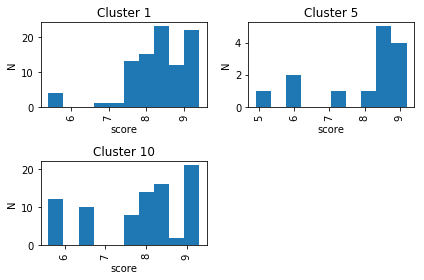

In [151]:
draw_hist(df_restaurant, 'score')

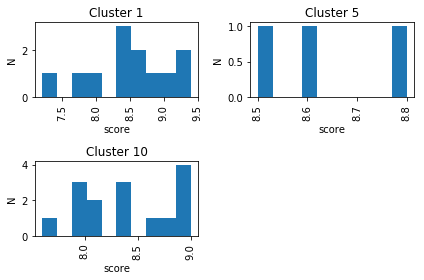

In [152]:
draw_hist(df_top_venues, 'score')